In [238]:
import mplleaflet
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

### 1. Trying to find the cause of bad data from last day

In [239]:
df = pd.read_csv("datasets/company_raw.csv")
df.shape

(60492, 8)

In [240]:
# Function to find distance between 2 coordinates
def find_distance(lat1, long1, lat2, long2):
    
    DOF_lat = lat1 - lat2
    DOF_long = long1 - long2
    
    dist_lat = DOF_lat * 111139
    dist_long = DOF_long * 111139
    
    dist = np.sqrt((dist_lat*dist_lat) + (dist_long*dist_long))
    
    return dist

# Function to calculate total distance
def total_dist(df_trip):

    points_no = len(df_trip)
    total_dist = 0

    for i in range(points_no - 1):
        current_lat = df_trip["lat"].iloc[i]
        current_long = df_trip["lon"].iloc[i]
        next_lat = df_trip["lat"].iloc[i+1]
        next_long = df_trip["lon"].iloc[i+1]
    
        delta = find_distance(current_lat,current_long,next_lat,next_long)
    
        total_dist = total_dist + delta
    
    return (total_dist/1000)

# Function to calculate total time
def total_time(df_trip):
    points_no = len(df_trip)
    total_time = 0
    cnt = 0
    
    for i in range(points_no-1):
        
        current_ts = df["timestamp"].iloc[i]
        next_ts = df["timestamp"].iloc[i+1]
        
        dt1 = datetime.fromtimestamp(current_ts/1000) #Removing milliseconds
        dt2 = datetime.fromtimestamp(next_ts/1000)
        delta = dt2 - dt1
        delta_seconds = delta.total_seconds()
        
        if(delta_seconds >= 0):
            total_time = total_time + delta_seconds
            
        else:
            cnt += 1
        
        if(cnt != 0):
            print("Found", cnt, " negative time values")
        
    return (total_time/3600)

# Function to plot route on map
def plot_trip(df_trip):
    plt.plot(df_trip["lon"],df_trip["lat"],"green")
    plt.plot(df_trip["lon"], df_trip["lat"], "rs")
    mplleaflet.show()
    

In [241]:
def parts(df, slice_no):
    
    df_parts = pd.DataFrame(columns=["slice","distance covered","time duration"])

    start_index = 0

    for i in range(slice_no):
    
        end_index = start_index + round((len(df)/slice_no))
    
        time = total_time(df[start_index:end_index])
        dist = total_dist(df[start_index:end_index])
        slicex =  str(start_index) + " : " + str(end_index)
        df_parts = df_parts.append({"slice":slicex, "distance covered":dist, "time duration":time}, ignore_index = True)
        start_index = end_index
        
    return df_parts

In [242]:
df_parts = parts(df, 6)

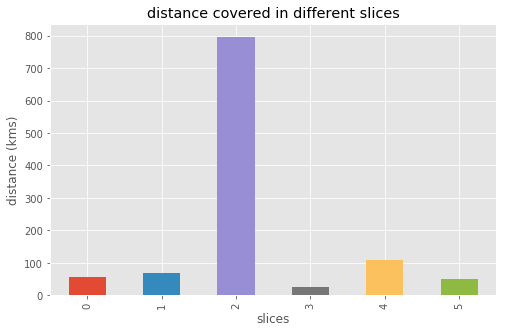

,slice,distance covered,time duration
0,0 : 10082,56.699078,1.643817
1,10082 : 20164,69.415304,1.643817
2,20164 : 30246,796.825644,1.643817
3,30246 : 40328,25.122357,1.643817
4,40328 : 50410,108.951347,1.643817
5,50410 : 60492,50.331934,1.643817


In [243]:
plt.figure(figsize=(8,5))
plt.title("distance covered in different slices")
plt.xlabel("slices")
plt.ylabel("distance (kms)")
df_parts["distance covered"].plot(kind="bar")
plt.show()
df_parts

2nd slice bad data

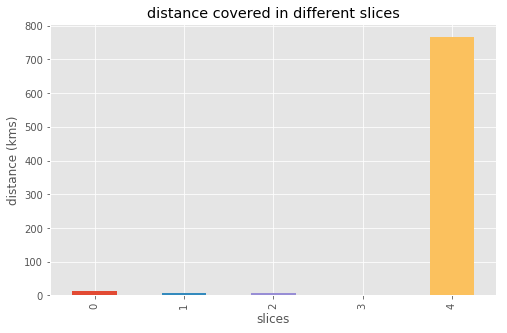

,slice,distance covered,time duration
0,0 : 2016,11.817577,0.158614
1,2016 : 4032,8.394367,0.158614
2,4032 : 6048,6.700760,0.158614
3,6048 : 8064,1.997980,0.158614
4,8064 : 10080,767.864062,0.158614


In [244]:
df_bad = df[20164:30246]

df_parts = parts(df_bad, 5)
plt.figure(figsize=(8,5))
plt.title("distance covered in different slices")
plt.xlabel("slices")
plt.ylabel("distance (kms)")
df_parts["distance covered"].plot(kind="bar")
plt.show()
df_parts

4th slice bad data

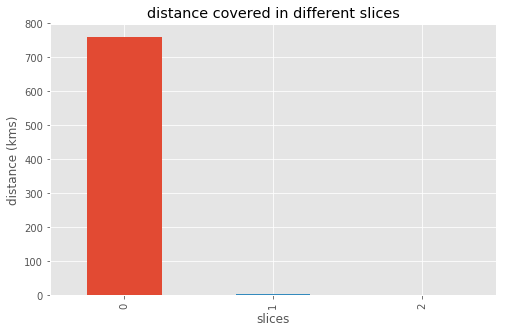

,slice,distance covered,time duration
0,0 : 673,761.292855,0.058463
1,673 : 1346,4.297072,0.058463
2,1346 : 2019,2.274384,0.058463


In [245]:
df_bad2 = df_bad[8060:10080]
df_parts = parts(df_bad2, 3)
df_parts
plt.figure(figsize=(8,5))
plt.title("distance covered in different slices")
plt.xlabel("slices")
plt.ylabel("distance (kms)")
df_parts["distance covered"].plot(kind="bar")
plt.show()
df_parts

In [246]:
df_bad3 = df_bad2[0:673]
df_parts = parts(df_bad3, 3)
df_parts

,slice,distance covered,time duration
0,0 : 224,0.129589,0.02132
1,224 : 448,733.773626,0.02132
2,448 : 672,22.042485,0.02132


Lets plot the bad data

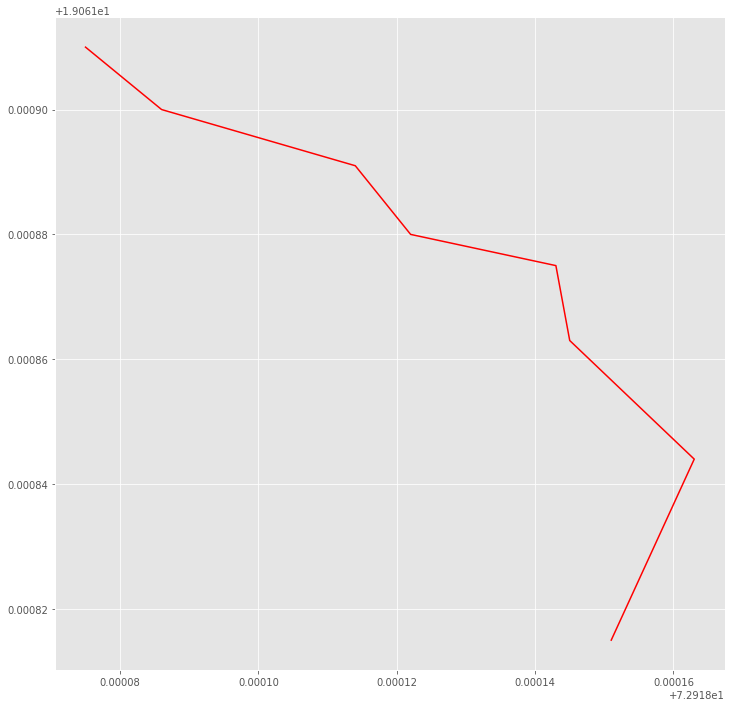

In [247]:
df_bad = df_bad3[220:279]
plt.figure(figsize=(12,12))
plt.style.use("ggplot")
plt.plot(df_bad["lon"], df_bad["lat"], "r")
plt.show()

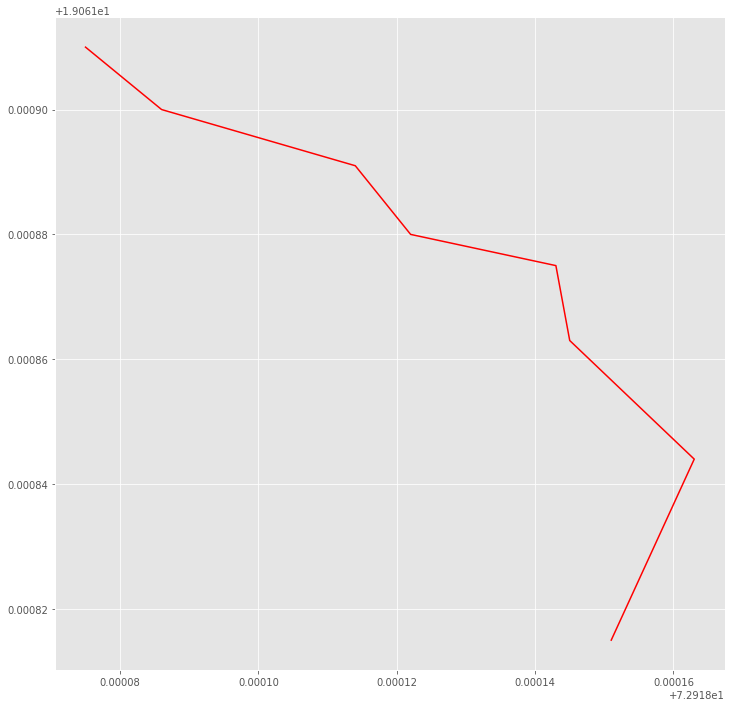

In [248]:
df_bad = df_bad3[220:280]
plt.figure(figsize=(12,12))
plt.style.use("ggplot")
plt.plot(df_bad["lon"], df_bad["lat"], "r")
plt.show()

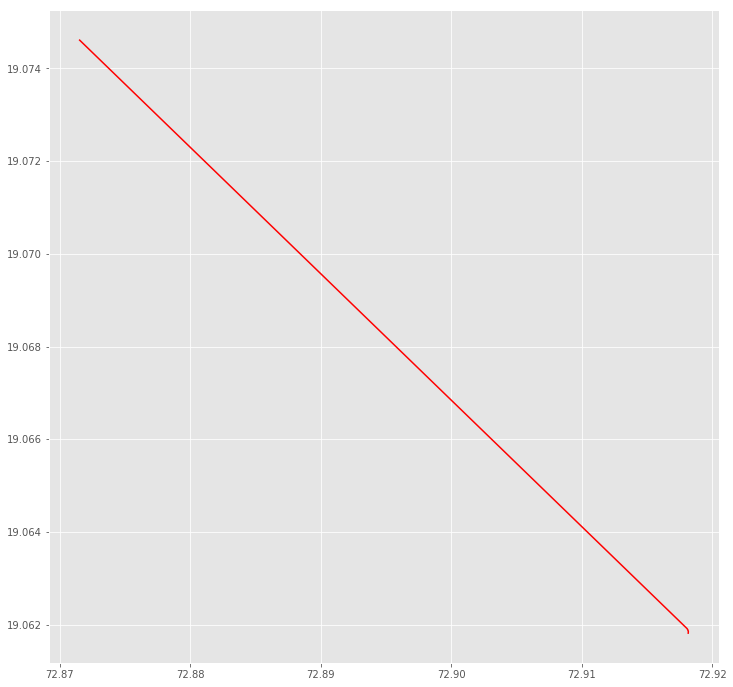

In [249]:
df_bad = df_bad3[220:281]
plt.figure(figsize=(12,12))
plt.style.use("ggplot")
plt.plot(df_bad["lon"], df_bad["lat"], "r")
plt.show()

* **By trail and error I find out that the including 281st point in graph change the graph to a straight line.**
* **The reason for this might be that this one point was extremely far off and was causing faulty measurements.**

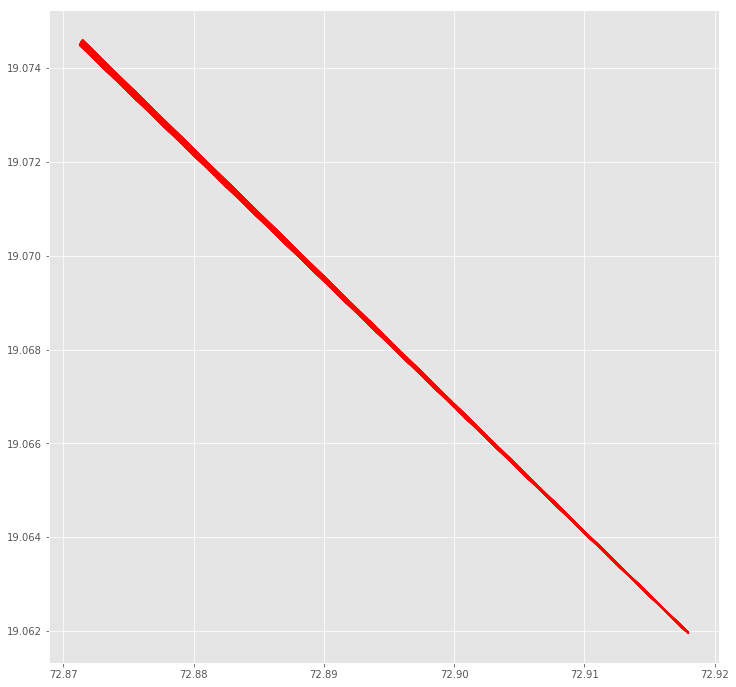

In [250]:
df_bad = df_bad3[300:400]
plt.figure(figsize=(12,12))
plt.style.use("ggplot")
plt.plot(df_bad["lon"], df_bad["lat"], "r")
plt.show()

plot_trip(df_bad) #Opens in browser after running the program

* **If we plot the rest of the bad data, we can see that the line thickens.**
* **This means that the incremental readings were ocillating between 2 very distant points and were causing a huge spike in the distance covered.**

In [251]:
df_bad3[278:350]

,Unnamed: 0,heading,id,img_front,lat,lon,speed,timestamp
28502,50087,NE,DB002,img_front_DB002_2018_09_20_11_36_54_692000.jpg,19.061910,72.918075,4.713340,1537423614692
28503,50089,NE,DB002,img_front_DB002_2018_09_20_11_36_54_692000.jpg,19.061910,72.918075,4.713340,1537423615000
28504,50090,NE,DB002,NaN,19.074612,72.871518,4.713340,1537423615000
28505,50091,NE,DB002,img_front_DB002_2018_09_20_11_36_55_012000.jpg,19.061910,72.918075,4.713340,1537423615012
28506,50092,NE,DB002,img_front_DB002_2018_09_20_11_36_55_099000.jpg,19.074612,72.871518,4.713340,1537423615099
28507,50093,NE,DB002,img_front_DB002_2018_09_20_11_36_55_311000.jpg,19.061910,72.918075,4.749917,1537423615311
28508,50094,NE,DB002,img_front_DB002_2018_09_20_11_36_55_344000.jpg,19.074612,72.871518,4.823071,1537423615344
28509,50095,NE,DB002,img_front_DB002_2018_09_20_11_36_55_560000.jpg,19.074612,72.871518,4.859648,1537423615560
28510,50096,NE,DB002,img_front_DB002_2018_09_20_11_36_55_647000.jpg,19.061910,72.918075,4.859648,1537423615647
28511,50097,NE,DB002,img_front_DB002_2018_09_20_11_36_55_872000.jpg,19.074612,72.871518,4.859648,1537423615872


* **We can see that the lat is oscillating from *19.06* to *19.07* and longitude is oscillating from *72.87* to *72.91***

## 2. Solving the issue

In [252]:
df.columns = ["index","heading","id","img_front","lat","lon","speed","timestamp"]
df.head(2)

,index,heading,id,img_front,lat,lon,speed,timestamp
0,7191,NE,DB002,NaN,18.528308,73.873303,0.0,1537409201000
1,7192,NE,DB002,img_front_DB002_2018_09_20_07_36_41_369000.jpg,18.528308,73.873303,0.0,1537409201369


In [261]:
# Function to fix the oscillation problem
def remove_bad_data(df):
    
    #df_cleaned = pd.DataFrame(columns=["index","heading","id","img_front","lat","lon","speed","timestamp"])
    df_cleaned = df
    cnt = 0
    
    for i in range(len(df)-1):
        
        lat1 = df_cleaned["lat"].iloc[i]
        lon1 = df_cleaned["lon"].iloc[i]
        lat2 = df_cleaned["lat"].iloc[i+1]
        lon2 = df_cleaned["lon"].iloc[i+1]
        delta_len = find_distance(lat1, lon1, lat2, lon2)
        
        if delta_len > 2000:
            cnt += 1
            
    for i in range(len(df)-(cnt*2)+10):
        
        lat1 = df_cleaned["lat"].iloc[i]
        lon1 = df_cleaned["lon"].iloc[i]
        lat2 = df_cleaned["lat"].iloc[i+1]
        lon2 = df_cleaned["lon"].iloc[i+1]
        delta_len = find_distance(lat1, lon1, lat2, lon2)
        
        if delta_len > 1000:
            
            #df_cleaned = df_cleaned[(df_cleaned["lat"] != lat1) & (df_cleaned["lon"] != lon1)]
            df_cleaned = df_cleaned[(df_cleaned["lat"] != lat2) & (df_cleaned["lon"] != lon2)]
        
    print(cnt)
        
    return df_cleaned
            

In [260]:
df_cleaned = remove_bad_data(df[28000:31500])
plot_trip(df_cleaned) #Opens in browser after running the program

142
